In [162]:
"""
@author: Jameel Saccoh
"""

'\n@author: Jameel Saccoh\n'

In [163]:
#install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute


In [164]:
# Load and preview housing dataset
housing = pd.read_csv('house_sales.csv')
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [165]:
#Find the number of records within the dataset
print("Number of records:", housing.shape[0],"\n")

#Find all the null values within the dataset
print(housing.isna().sum())

Number of records: 21613 

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [166]:
#Handle missing values for bedroom and bathroom columns with median imputation
housing['bedrooms'].fillna(housing['bedrooms'].median(), inplace=True)
housing['bathrooms'].fillna(housing['bathrooms'].median(), inplace=True)

#Handle missing values for sqft_living and sqft_lot columns with mean imputation rounded to the nearest integer
housing['sqft_living'].fillna(round(housing['sqft_living'].mean(),0), inplace=True)
housing['sqft_lot'].fillna(round(housing['sqft_lot'].mean(),0), inplace=True)

#Check for any remaining null values
print(housing.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


C:\Users\jamee\AppData\Local\Temp\ipykernel_11616\3364273193.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['bedrooms'].fillna(housing['bedrooms'].median(), inplace=True)
C:\Users\jamee\AppData\Local\Temp\ipykernel_11616\3364273193.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

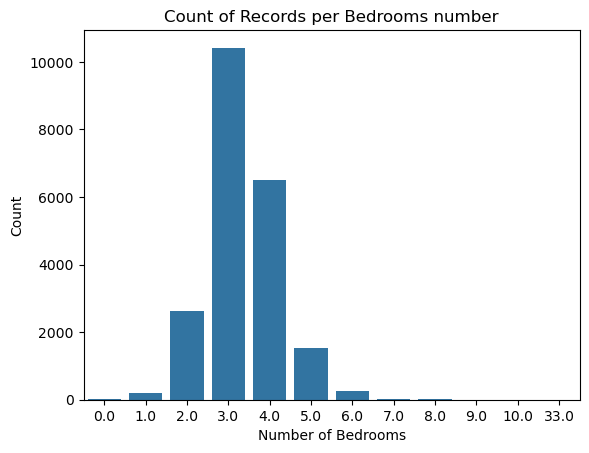

In [167]:
#Plot count of records per number of bedrooms
sns.countplot(x='bedrooms', data=housing)
plt.title('Count of Records per Bedrooms number')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

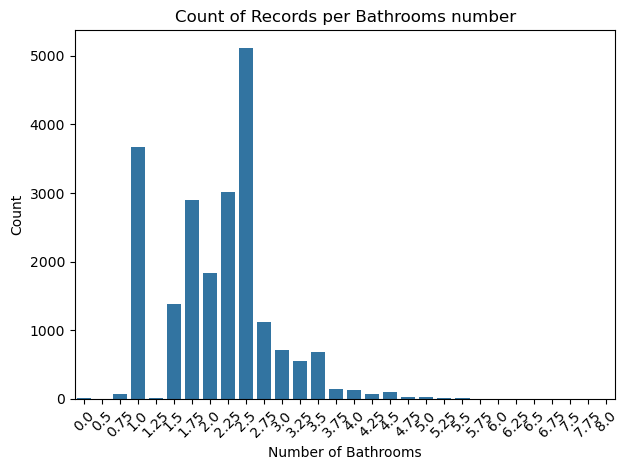

In [168]:
#Plot count of records per number of bathrooms
sns.countplot(x='bathrooms', data=housing)
plt.title('Count of Records per Bathrooms number')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

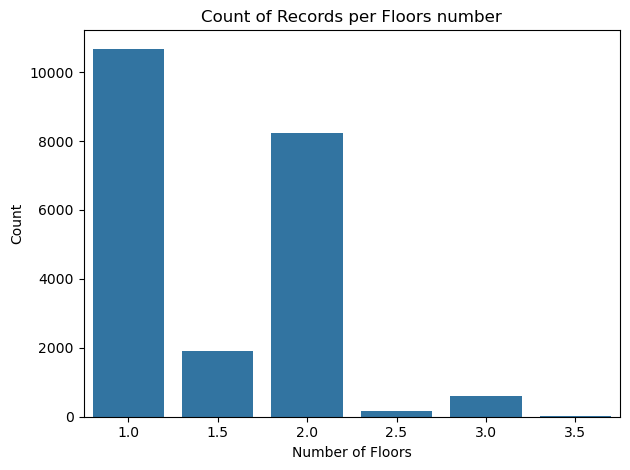

In [169]:
#Plot count of records per number of floors
sns.countplot(x='floors', data=housing)
plt.title('Count of Records per Floors number')
plt.xlabel('Number of Floors')
plt.ylabel('Count')
plt.tight_layout()

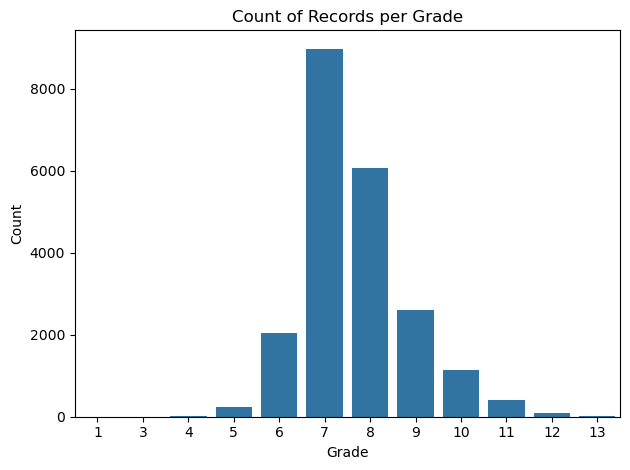

In [170]:
#Plot count of records per grade
sns.countplot(x='grade', data=housing)
plt.title('Count of Records per Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.tight_layout()

In [171]:
#Create subset of data with price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, and grade
struct_df = housing[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade','sqft_above','sqft_basement']]

#Calculate correlation matrix
correlation_matrix = struct_df.corr()

#print correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                   price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.302493   0.515365     0.681806  0.086295  0.256794   
bedrooms       0.302493  1.000000   0.487280     0.549012  0.027169  0.172168   
bathrooms      0.515365  0.487280   1.000000     0.714817  0.083221  0.487859   
sqft_living    0.681806  0.549012   0.714817     1.000000  0.160199  0.345740   
sqft_lot       0.086295  0.027169   0.083221     0.160199  1.000000 -0.005540   
floors         0.256794  0.172168   0.487859     0.345740 -0.005540  1.000000   
grade          0.667434  0.348556   0.648745     0.744523  0.109002  0.458183   
sqft_above     0.605567  0.465769   0.667757     0.851347  0.176906  0.523885   
sqft_basement  0.323816  0.291689   0.276989     0.420816  0.015212 -0.245705   

                  grade  sqft_above  sqft_basement  
price          0.667434    0.605567       0.323816  
bedrooms       0.348556    0.465769       0.291689  
bathrooms

In [172]:
struct_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement
count,2.161300e+04,21613.00000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.35326,2.120252,2081.069912,1.517983e+04,1.494309,7.656873,1788.390691,291.509045
std,3.671272e+05,0.90977,0.750257,891.234976,4.047174e+04,0.539989,1.175459,828.090978,442.575043
min,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000
25%,3.219500e+05,3.00000,1.750000,1450.000000,5.140000e+03,1.000000,7.000000,1190.000000,0.000000
50%,4.500000e+05,3.00000,2.250000,1980.000000,7.830000e+03,1.500000,7.000000,1560.000000,0.000000
75%,6.450000e+05,4.00000,2.500000,2510.000000,1.186700e+04,2.000000,8.000000,2210.000000,560.000000
max,7.700000e+06,33.00000,8.000000,12050.000000,1.651359e+06,3.500000,13.000000,9410.000000,4820.000000


<Axes: title={'center': 'Price vs Square Footage of Living Space'}, xlabel='sqft_living', ylabel='price'>

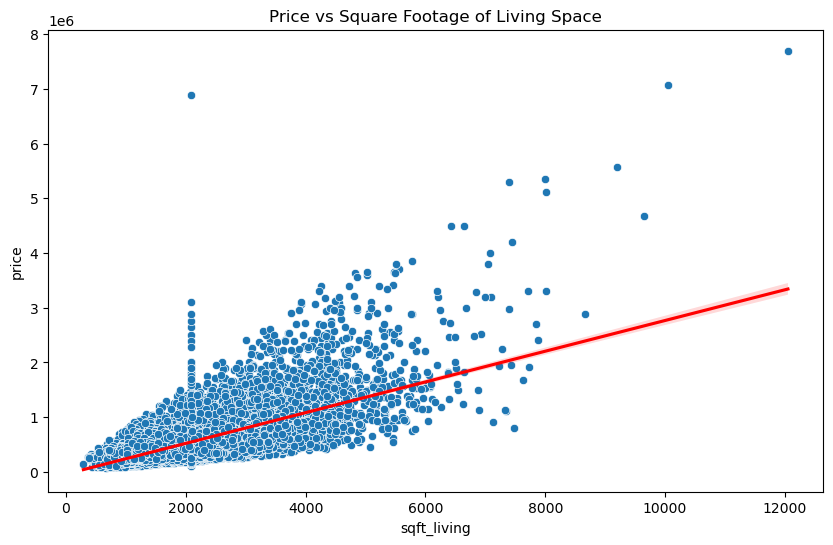

In [173]:
#Plot price vs sqft_living with line of best fit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=housing)
plt.title('Price vs Square Footage of Living Space')
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Price')
sns.regplot(x='sqft_living', y='price', data=housing, scatter=False, color='red')

In [174]:
#Split the data between training and testing sets
X = struct_df.drop('price', axis=1)
y = struct_df['price']

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a linear regression model
model = LinearRegression()

#Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [175]:
#Check r-squared value of the model
struct_model = sm.add_constant(X_train)
struct_model_res = OLS(y_train,X_train).fit()
struct_model_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.852
Method:                 Least Squares   F-statistic:                          1.245e+04
Date:                Sun, 10 Aug 2025   Prob (F-statistic):                        0.00
Time:                        20:33:46   Log-Likelihood:                     -2.3938e+05
No. Observations:               17290   AIC:                                  4.788e+05
Df Residuals:                   17282   BIC:                                  4.788e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -7.386e+04   2305.837    -32.030      0.000   -7.84e+04   -6.93e+04
bathrooms     -6975.0981   4136.424     -1.686      0.092   -1.51e+04    1132.712
sqft_living     -36.1311      9.294     -3.888      0.000     -54.347     -17.915
sqft_lot         -0.4249      0.051     -8.257      0.000      -0.526      -0.324
floors        -2.543e+04   4635.012     -5.486      0.000   -3.45e+04   -1.63e+04
grade          3.572e+04   1360.819     26.246      0.000     3.3e+04    3.84e+04
sqft_above      309.4438      9.333     33.155      0.000     291.150     327.738
sqft_basement   346.4075     10.261     33.760      0.000     326.295     366.520
==============================================================================
Omnibus:                    12831.065   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           600346.035
Skew:                           3.096   Prob(JB):                         0.00
Kurtosis:                      31.195   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
# Test the model on the test set
y_pred = model.predict(X_test)
y_pred

array([ 520304.51688853,  723515.5726481 , 1167295.49821263, ...,
        589363.67177804,  578289.07455117,  614042.72904717])

In [177]:
#Mean absolute error
mean_absolute_error(y_test, y_pred)

164302.3359401914

In [178]:
#Cross validation method
cv = KFold(n_splits = 5, random_state=222, shuffle=True)

#Use the method to evaluate model
scores = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=cv, n_jobs = -1)

#Check mean absolute error
mae_scores = mean(absolute(scores))
mae_scores

159529.66172237677

In [212]:
#Create dataframe using every feature but price, binary features, and other insignificant features to price
num_feat = housing.drop(['price', 'id', 'date', 'zipcode', 'lat', 'long'], axis=1)

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(num_feat, y, test_size=0.2, random_state=42)

#Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [214]:
#Check r-squared value of the model
struct_model = sm.add_constant(X_train)
struct_model_res = OLS(y_train,X_train).fit()
struct_model_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              8557.
Date:                Sun, 10 Aug 2025   Prob (F-statistic):                        0.00
Time:                        21:28:10   Log-Likelihood:                     -2.3747e+05
No. Observations:               17290   AIC:                                  4.750e+05
Df Residuals:                   17275   BIC:                                  4.751e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.814e+04   2331.374    -12.069      0.000   -3.27e+04   -2.36e+04
bathrooms     -5754.6857   3720.244     -1.547      0.122    -1.3e+04    1537.370
sqft_living     -26.1473      8.335     -3.137      0.002     -42.485      -9.809
sqft_lot          0.0285      0.067      0.427      0.670      -0.103       0.160
floors         3554.9151   4278.323      0.831      0.406   -4831.031    1.19e+04
waterfront     5.541e+05    2.2e+04     25.237      0.000    5.11e+05    5.97e+05
view           5.531e+04   2608.754     21.203      0.000    5.02e+04    6.04e+04
condition      5.816e+04   2686.859     21.647      0.000    5.29e+04    6.34e+04
grade           1.11e+05   2584.427     42.967      0.000    1.06e+05    1.16e+05
sqft_above      190.4379      8.988     21.187      0.000     172.820     208.056
sqft_basement   218.9183      9.494     23.060      0.000     200.310     237.527
yr_built       -409.8080      9.716    -42.178      0.000    -428.852    -390.763
yr_renovated     69.7425      4.309     16.184      0.000      61.296      78.189
sqft_living15    17.2615      4.160      4.150      0.000       9.108      25.415
sqft_lot15       -0.6515      0.092     -7.062      0.000      -0.832      -0.471
==============================================================================
Omnibus:                    12922.694   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           914805.516
Skew:                           2.985   Prob(JB):                         0.00
Kurtosis:                      38.131   Cond. No.                     6.22e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
# Test the model on the test set
y_pred = model.predict(X_test)
y_pred


array([ 528528.46770355,  684231.4757155 , 1227421.21542145, ...,
        507056.85939439,  562061.59288962,  523706.72411786])

In [182]:
#Mean absolute error
mean_absolute_error(y_test, y_pred)

143433.17178940342

In [183]:
#Cross validation method
cv = KFold(n_splits = 5, random_state=222, shuffle=True)

#Use the method to evaluate model
scores = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=cv, n_jobs = -1)

#Check mean absolute error
mae_scores = mean(absolute(scores))
mae_scores

139202.8829235144